In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../../data/beijinga_scaled.csv",index_col=0)

In [4]:
df.head()

,latitude,longitude,ts,station_id,PM2.5
0,0.58292,0.17557,0.000000,1001.0,156.250000
0,0.58292,0.17557,0.002747,1001.0,24.833333
0,0.58292,0.17557,0.005495,1001.0,72.583333
0,0.58292,0.17557,0.008242,1001.0,30.043478
0,0.58292,0.17557,0.010989,1001.0,23.083333


In [5]:
stations = df["station_id"].unique()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Code borrowed from [here](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/).

In [7]:
pm_values.shape

NameError: name 'pm_values' is not defined

In [8]:
pm_values.shape

NameError: name 'pm_values' is not defined

In [9]:
stations[:2]

array([1001., 1002.])

(351,)
(351,)
(351,)


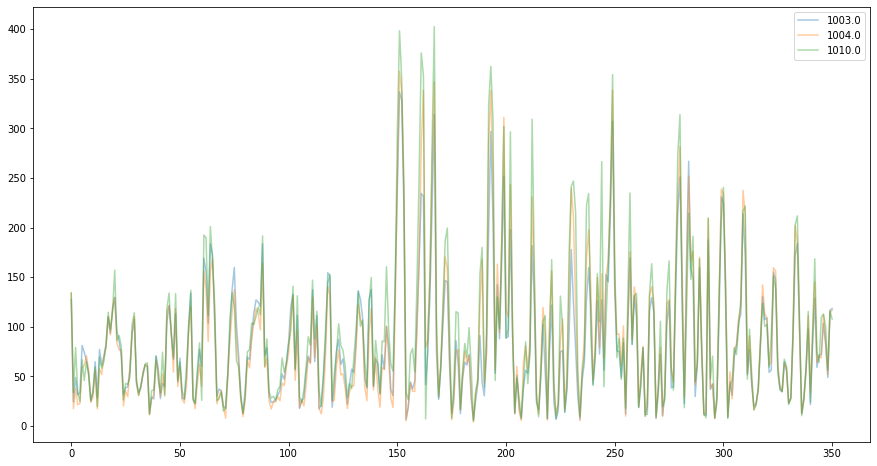

In [10]:
plt.figure(figsize=(15,8))
for stn in stations[4:7]:
    pm_values = df[df['station_id'] == stn]['PM2.5'].values
    print( pm_values.shape )
    
    plt.plot(pm_values, label=str(stn), alpha = 0.4)
    
    plt.legend()

In [32]:
df.head()

,latitude,longitude,ts,station_id,PM2.5
0,0.58292,0.17557,0.000000,1001.0,156.250000
0,0.58292,0.17557,0.002747,1001.0,24.833333
0,0.58292,0.17557,0.005495,1001.0,72.583333
0,0.58292,0.17557,0.008242,1001.0,30.043478
0,0.58292,0.17557,0.010989,1001.0,23.083333


In [7]:
df.head()

,latitude,longitude,ts,station_id,PM2.5
0,0.58292,0.17557,0.000000,1001.0,156.250000
0,0.58292,0.17557,0.002747,1001.0,24.833333
0,0.58292,0.17557,0.005495,1001.0,72.583333
0,0.58292,0.17557,0.008242,1001.0,30.043478
0,0.58292,0.17557,0.010989,1001.0,23.083333


In [9]:
auto_corr_station = {stn:{i:np.nan for i in range(1,31)} for stn in stations}

In [18]:
for stn in stations:
    tdf = df.groupby('station_id').get_group(stn)
    for lg in range(31):
        auto_corr_station[stn][lg] = tdf['PM2.5'].autocorr(lag=lg)

In [19]:
auto_corr_station

{1001.0: {1: 0.511955113881067,
  2: 0.10982957421641479,
  3: 0.037301396235916225,
  4: 0.061092434922233034,
  5: 0.13716951766745533,
  6: 0.07017206596723295,
  7: -0.03348961273265085,
  8: 0.020885364155686835,
  9: 0.12463611719134976,
  10: 0.12112281918569726,
  11: 0.07610678459427396,
  12: -0.01931791585472328,
  13: -0.06077802036111783,
  14: -0.08133606178443216,
  15: -0.06398350939652388,
  16: -0.020534827844981732,
  17: -0.047192633963666894,
  18: 0.023749468727072426,
  19: 0.11657649367749255,
  20: 0.1355265516193226,
  21: 0.13540488221227237,
  22: -0.01850804094584679,
  23: -0.12598777241362588,
  24: -0.06377810157685972,
  25: 0.039492634655251095,
  26: 0.12317177863950816,
  27: 0.12361670803748631,
  28: 0.04884348567818086,
  29: 0.06355869785750437,
  30: 0.09725777105279118,
  0: 1.0},
 1002.0: {1: 0.5342559730740494,
  2: 0.0941461973272409,
  3: -0.05290048527102993,
  4: -0.06587047773369455,
  5: 0.010126809304652089,
  6: 0.0041133868786402865,

In [20]:
import matplotlib.pyplot as plt

In [21]:
auto_corr_station[1001]

{1: 0.511955113881067,
 2: 0.10982957421641479,
 3: 0.037301396235916225,
 4: 0.061092434922233034,
 5: 0.13716951766745533,
 6: 0.07017206596723295,
 7: -0.03348961273265085,
 8: 0.020885364155686835,
 9: 0.12463611719134976,
 10: 0.12112281918569726,
 11: 0.07610678459427396,
 12: -0.01931791585472328,
 13: -0.06077802036111783,
 14: -0.08133606178443216,
 15: -0.06398350939652388,
 16: -0.020534827844981732,
 17: -0.047192633963666894,
 18: 0.023749468727072426,
 19: 0.11657649367749255,
 20: 0.1355265516193226,
 21: 0.13540488221227237,
 22: -0.01850804094584679,
 23: -0.12598777241362588,
 24: -0.06377810157685972,
 25: 0.039492634655251095,
 26: 0.12317177863950816,
 27: 0.12361670803748631,
 28: 0.04884348567818086,
 29: 0.06355869785750437,
 30: 0.09725777105279118,
 0: 1.0}

/home/deepak/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


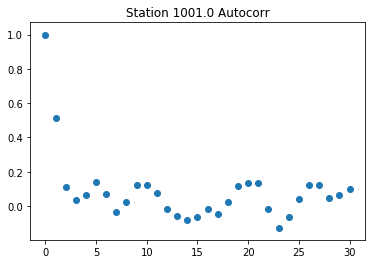

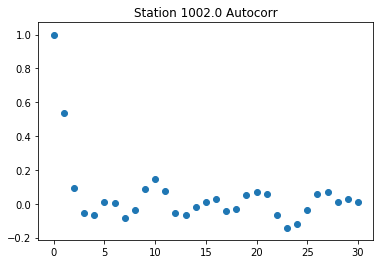

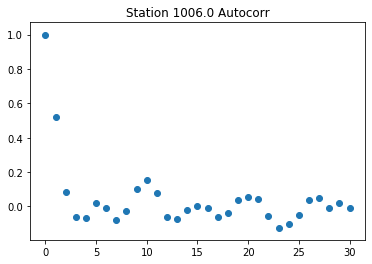

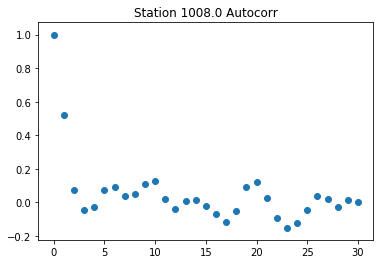

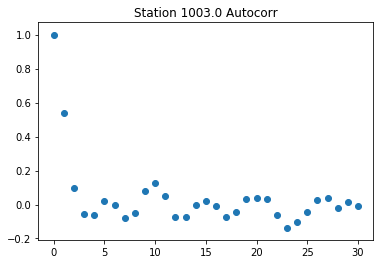

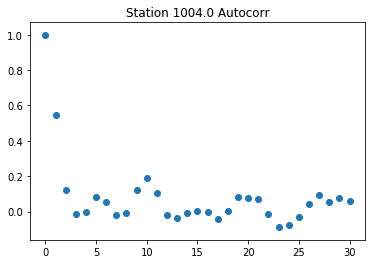

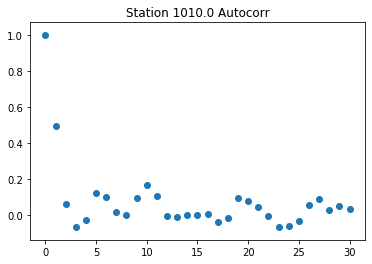

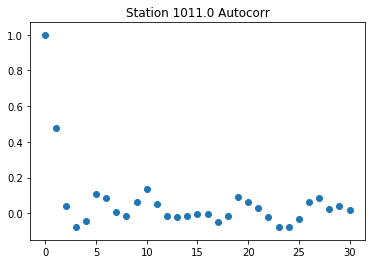

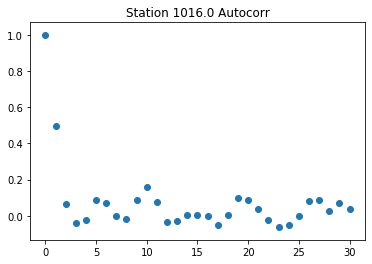

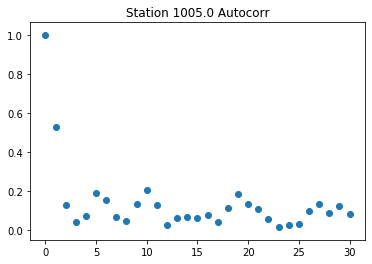

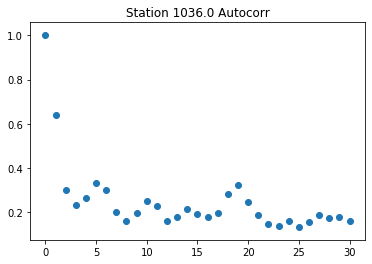

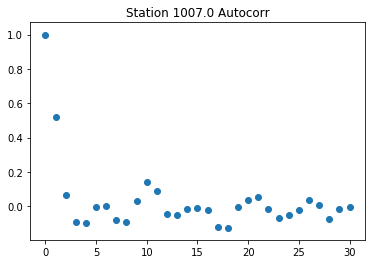

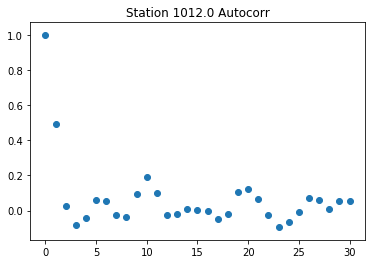

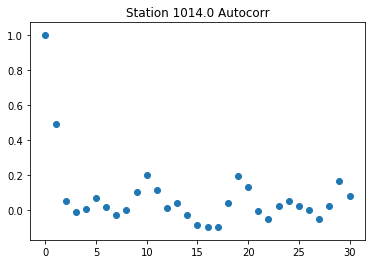

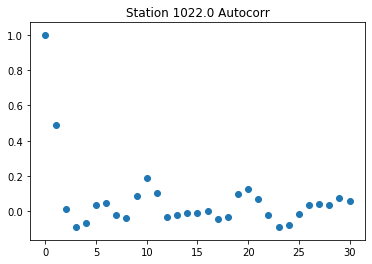

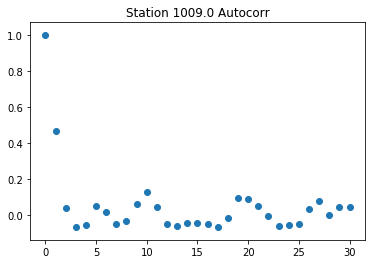

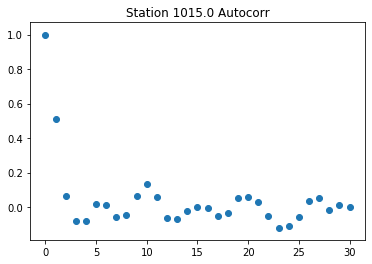

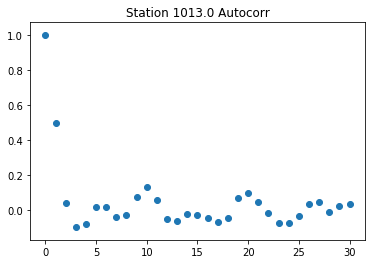

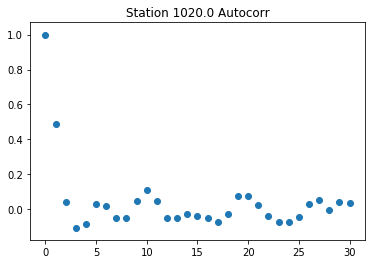

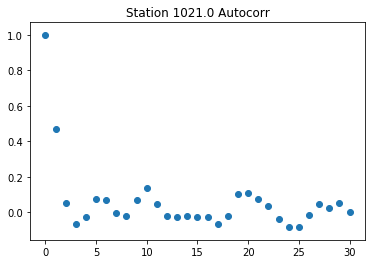

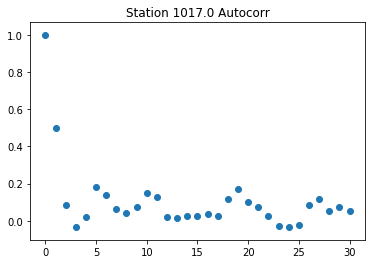

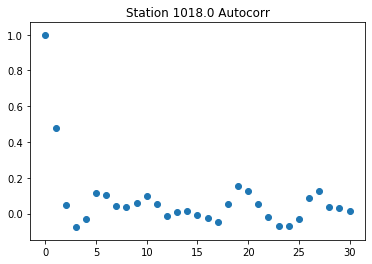

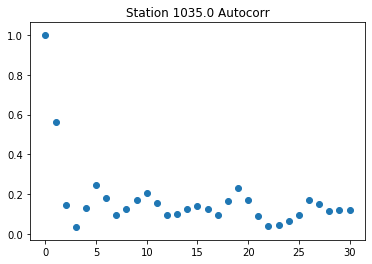

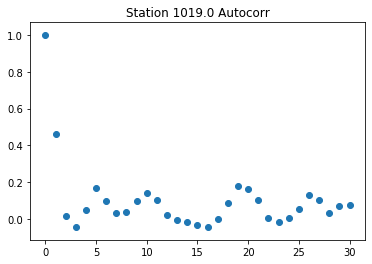

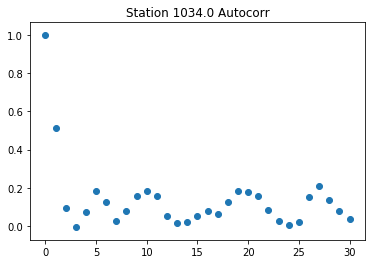

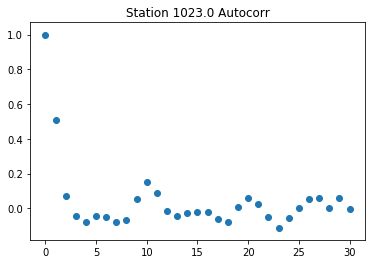

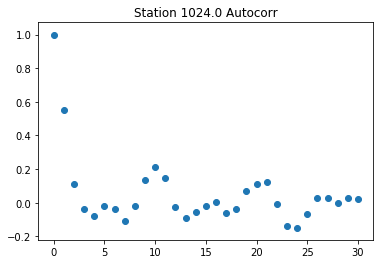

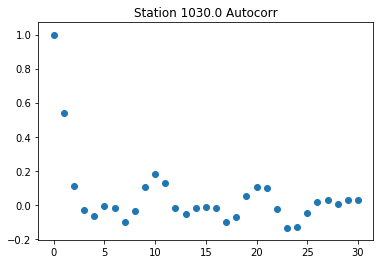

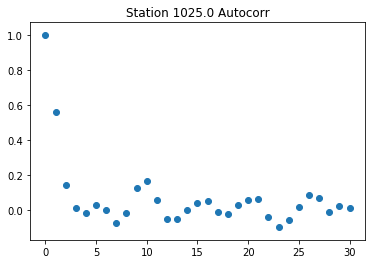

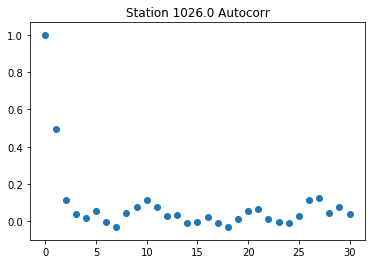

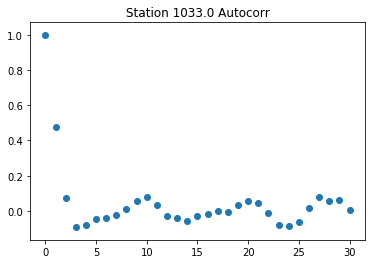

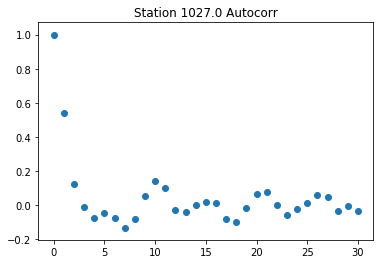

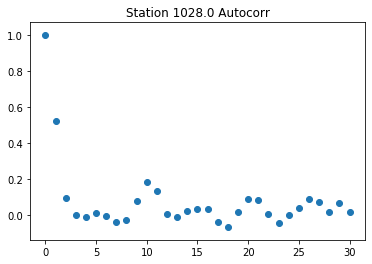

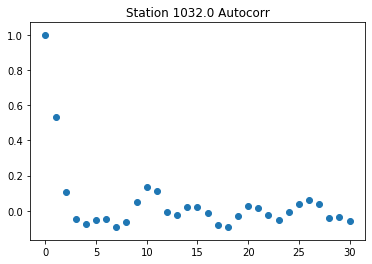

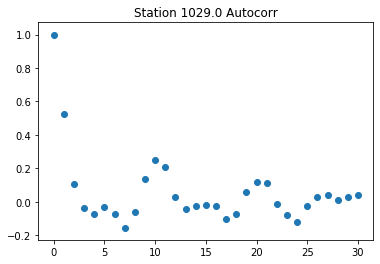

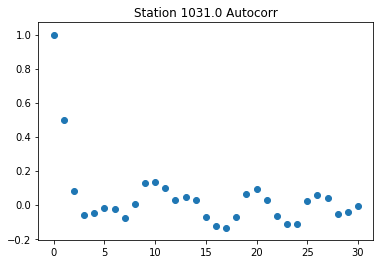

In [22]:
for stn in stations:
    current_dict = auto_corr_station[stn]
    x = []
    y = []
    for key, item in current_dict.items():
        x.append(key)
        y.append(item)
    plt.figure()
    plt.title("Station " + str(stn) + " Autocorr")
    plt.scatter(x, y)